In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
drive.mount('/content/gdriv')
data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [ ]:
'''
이상 필요 라이브러리 로딩
'''

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''
When visualizing the data features, this makes Korean available.
can be applied after initializing the RunTime.
'''

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'\nWhen visualizing the data features, this makes Korean available.\ncan be applied after initializing the RunTime.\n'

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
"""
Korean will be applied into Mathplot.
"""


'\nKorean will be applied into Mathplot.\n'

In [ ]:
data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

CJ_Logistics = pd.read_csv(data_path + '/Logis.csv')

In [ ]:
CJ_Logistics.head()

Unnamed: 0  DL_YMD DL_GD_LCLS_NM  ...  HDNG_NM HDNG_CD  INVC_CONT
0           0  190201         도서/음반  ...      동화동     665         16
1           1  190201       가구/인테리어  ...      신당동     615          4
2           2  190201       가구/인테리어  ...     성내1동     565          1
3           3  190201         도서/음반  ...     남산2동     650          6
4           4  190201        디지털/가전  ...     고산3동     690         21

[5 rows x 11 columns]

> 데이터 로드 후 헤드 프린트


In [ ]:
print("데이터 Attribute")
print(CJ_Logistics.columns)
print("-----------------------------")
print("-----------------------------")

print('분류 항목')
print(CJ_Logistics['DL_GD_LCLS_NM'].unique())
print(CJ_Logistics['DL_GD_LCLS_CD'].unique())
print("-----------------------------")
print("-----------------------------")

print('지역명')
print(CJ_Logistics['CTPV_NM'].unique())
print(CJ_Logistics['CTGG_NM'].unique())
print(CJ_Logistics['HDNG_NM'].unique())
print(len(CJ_Logistics['HDNG_NM'].unique()))

데이터 Attribute
Index(['Unnamed: 0', 'DL_YMD', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'CTPV_NM',
       'CTPV_CD', 'CTGG_NM', 'CTGG_CD', 'HDNG_NM', 'HDNG_CD', 'INVC_CONT'],
      dtype='object')
-----------------------------
-----------------------------
분류 항목
['도서/음반' '가구/인테리어' '디지털/가전' '스포츠/레저' '패션잡화' '식품' '생활건강' '패션의류' '화장품/미용'
 '출산/육아']
[12 10 13 16 20 17 15 19 21 18]
-----------------------------
-----------------------------
지역명
['서울특별시' '대구광역시']
['중구' '수성구' '노원구']
['동화동' '신당동' '성내1동' '남산2동' '고산3동' '회현동' '범어1동' '황학동' '남산4동' '대신동' '파동'
 '지산2동' '만촌2동' '약수동' '청구동' '상계10동' '상계8동' '상계9동' '지산1동' '월계1동' '대봉2동' '명동'
 '공릉1동' '월계3동' '하계2동' '성내2동' '성내3동' '수성4가동' '범어3동' '삼덕동' '공릉2동' '남산1동'
 '만촌3동' '중동' '동인동' '신당제5동' '고산1동' '을지로동' '상동' '하계1동' '범어4동' '소공동' '범어2동'
 '범물2동' '상계6.7동' '수성2.3가동' '월계2동' '상계1동' '중계본동' '다산동' '만촌1동' '상계5동' '범물1동'
 '중계2.3동' '중계4동' '중계1동' '황금1동' '광희동' '상계2동' '수성1가동' '황금2동' '고산2동' '두산동'
 '상계3.4동' '필동' '중림동' '장충동' '남산3동' '대봉1동']
69


> 각 칼럼에 대한 정보를 얻을 수 있다.

In [ ]:
CJ_Logistics['STD_Y'] = CJ_Logistics['DL_YMD'].astype(str).str.slice(0, 2)
CJ_Logistics['STD_M'] = CJ_Logistics['DL_YMD'].astype(str).str.slice(2, 4)
CJ_Logistics['STD_D'] = CJ_Logistics['DL_YMD'].astype(str).str.slice(4, 6)

CJ_Logistics['DL_YMD'] = pd.to_datetime('20' + CJ_Logistics['STD_Y'] + '-' + CJ_Logistics['STD_M'] + '-' + CJ_Logistics['STD_D'])

CJ_Logistics.head()

Unnamed: 0     DL_YMD DL_GD_LCLS_NM  ...  STD_Y STD_M  STD_D
0           0 2019-02-01         도서/음반  ...     19    02     01
1           1 2019-02-01       가구/인테리어  ...     19    02     01
2           2 2019-02-01       가구/인테리어  ...     19    02     01
3           3 2019-02-01         도서/음반  ...     19    02     01
4           4 2019-02-01        디지털/가전  ...     19    02     01

[5 rows x 14 columns]

In [ ]:
Logi_19 = (CJ_Logistics['STD_Y'] == '19')
Logi_20 = (CJ_Logistics['STD_Y'] == '20')
"""
19년 데이터와 20년 데이터 분리
"""

Logi_Daegu = (CJ_Logistics['CTPV_NM'] == '대구광역시')
Logi_Seoul = (CJ_Logistics['CTPV_NM'] == '서울특별시')
"""
서울 특별시 데이터와 대구 광역시 데이터 분리
"""

print(Logi_19)
print(Logi_20)
print(Logi_Daegu)
print(Logi_Seoul)

0          True
1          True
2          True
3          True
4          True
          ...  
156566    False
156567    False
156568    False
156569    False
156570    False
Name: STD_Y, Length: 156571, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
156566     True
156567     True
156568     True
156569     True
156570     True
Name: STD_Y, Length: 156571, dtype: bool
0         False
1         False
2          True
3          True
4          True
          ...  
156566     True
156567    False
156568     True
156569    False
156570     True
Name: CTPV_NM, Length: 156571, dtype: bool
0          True
1          True
2         False
3         False
4         False
          ...  
156566    False
156567     True
156568    False
156569     True
156570    False
Name: CTPV_NM, Length: 156571, dtype: bool


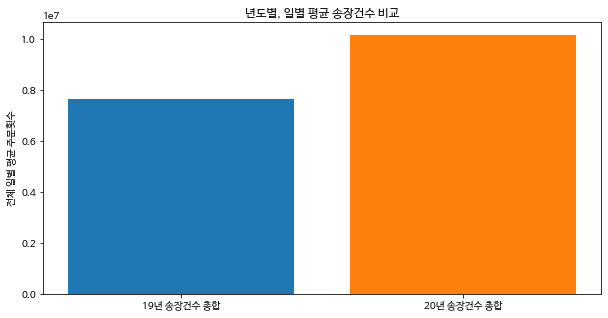

"\nmean_cnt_19 = cj_logistics.loc[rows_19, 'INVC_CONT'].mean()\nmean_cnt_20 = cj_logistics.loc[rows_20, 'INVC_CONT'].mean()\n\nplt.rcParams['figure.figsize'] = (10, 5)\n\nplt.bar('2019', mean_cnt_19)\nplt.bar('2020', mean_cnt_20)\n\nplt.title('년도별, 일별 평균 송장건수 비교')\nplt.ylabel('전체 일별 평균 주문횟수')\n\nplt.show()\n"

In [ ]:
sum_19 = CJ_Logistics.loc[Logi_19, 'INVC_CONT'].sum()
sum_20 = CJ_Logistics.loc[Logi_20, 'INVC_CONT'].sum()

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar('19년 송장건수 총합', sum_19)
plt.bar('20년 송장건수 총합', sum_20)

plt.title('년도별, 일별 평균 송장건수 비교')
plt.ylabel('전체 일별 평균 주문횟수')

plt.show()

"""
mean_cnt_19 = cj_logistics.loc[rows_19, 'INVC_CONT'].mean()
mean_cnt_20 = cj_logistics.loc[rows_20, 'INVC_CONT'].mean()

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar('2019', mean_cnt_19)
plt.bar('2020', mean_cnt_20)

plt.title('년도별, 일별 평균 송장건수 비교')
plt.ylabel('전체 일별 평균 주문횟수')

plt.show()
"""

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


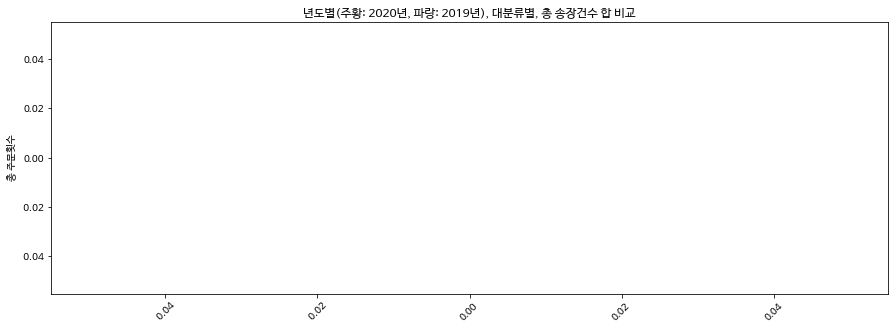

"\nplt.rcParams['figure.figsize'] = (15, 5)\n\ncols = ['DL_GD_LCLS_NM', 'INVC_CONT']\n\nmean_cnt_lcls_19 = cj_logistics.loc[rows_19, cols].groupby('DL_GD_LCLS_NM').mean().round(1)\nmean_cnt_lcls_20 = cj_logistics.loc[rows_20, cols].groupby('DL_GD_LCLS_NM').mean().round(1)\n\nplt.plot(mean_cnt_lcls_19)\nplt.plot(mean_cnt_lcls_20)\n\nplt.xticks(rotation = 45)\nplt.ylabel('일별 평균 주문횟수')\nplt.title('년도별(주황: 2020년, 파랑: 2019년), 대분류별, 일별 평균 송장건수 비교')\n\nplt.show()\n"

In [ ]:
rows_19 = (CJ_Logistics['STD_Y'] == 19)
rows_20 = (CJ_Logistics['STD_Y'] == 20)

plt.rcParams['figure.figsize'] = (15, 5)

cols = ['DL_GD_LCLS_NM', 'INVC_CONT']

sum_cnt_lcls_19 = CJ_Logistics.loc[rows_19, cols].groupby('DL_GD_LCLS_NM').mean()
sum_cnt_lcls_20 = CJ_Logistics.loc[rows_20, cols].groupby('DL_GD_LCLS_NM').mean()

plt.plot(sum_cnt_lcls_19)
plt.plot(sum_cnt_lcls_20)
plt.xticks(rotation = 45)

plt.ylabel('총 주문횟수')
plt.title('년도별(주황: 2020년, 파랑: 2019년), 대분류별, 총 송장건수 합 비교')

plt.show()
"""
plt.rcParams['figure.figsize'] = (15, 5)

cols = ['DL_GD_LCLS_NM', 'INVC_CONT']

mean_cnt_lcls_19 = cj_logistics.loc[rows_19, cols].groupby('DL_GD_LCLS_NM').mean().round(1)
mean_cnt_lcls_20 = cj_logistics.loc[rows_20, cols].groupby('DL_GD_LCLS_NM').mean().round(1)

plt.plot(mean_cnt_lcls_19)
plt.plot(mean_cnt_lcls_20)

plt.xticks(rotation = 45)
plt.ylabel('일별 평균 주문횟수')
plt.title('년도별(주황: 2020년, 파랑: 2019년), 대분류별, 일별 평균 송장건수 비교')

plt.show()
"""

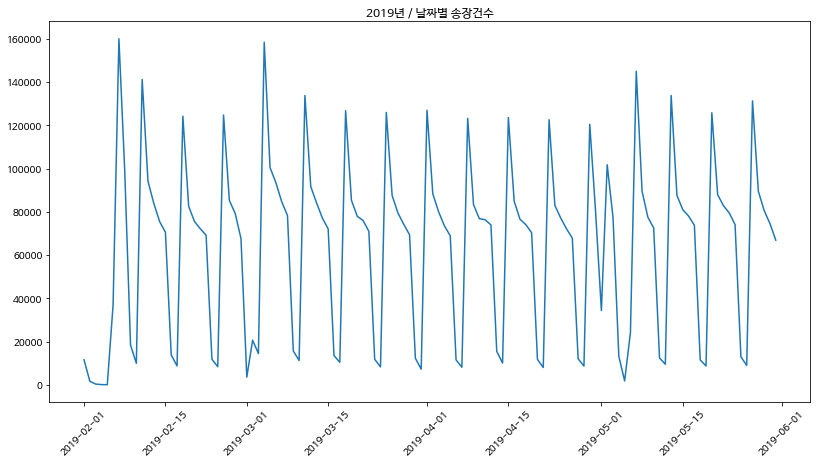

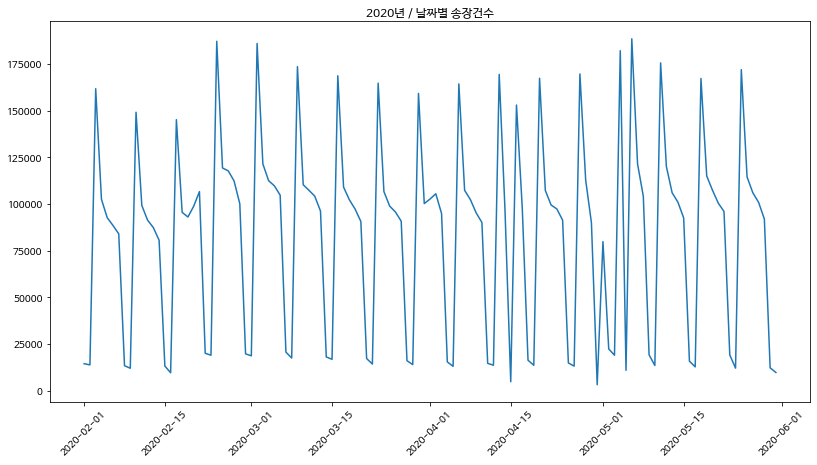

In [ ]:
cols = ['DL_YMD', 'INVC_CONT']
mean_cnt_ymd = CJ_Logistics.loc[:, cols].groupby('DL_YMD').sum()

rows_19 = (mean_cnt_ymd.index.astype(str).str.slice(0, 4) == '2019')
rows_20 = (mean_cnt_ymd.index.astype(str).str.slice(0, 4) == '2020')

plt.rcParams['figure.figsize'] = (30, 7)
plt.subplot(1, 2, 1)
plt.plot(mean_cnt_ymd[rows_19])
plt.xticks(rotation=45)
plt.title('2019년 / 날짜별 송장건수')
plt.show()

plt.rcParams['figure.figsize'] = (30, 7)
plt.subplot(1, 2, 1)
plt.plot(mean_cnt_ymd[rows_20])
plt.xticks(rotation=45)
plt.title('2020년 / 날짜별 송장건수')

plt.show()

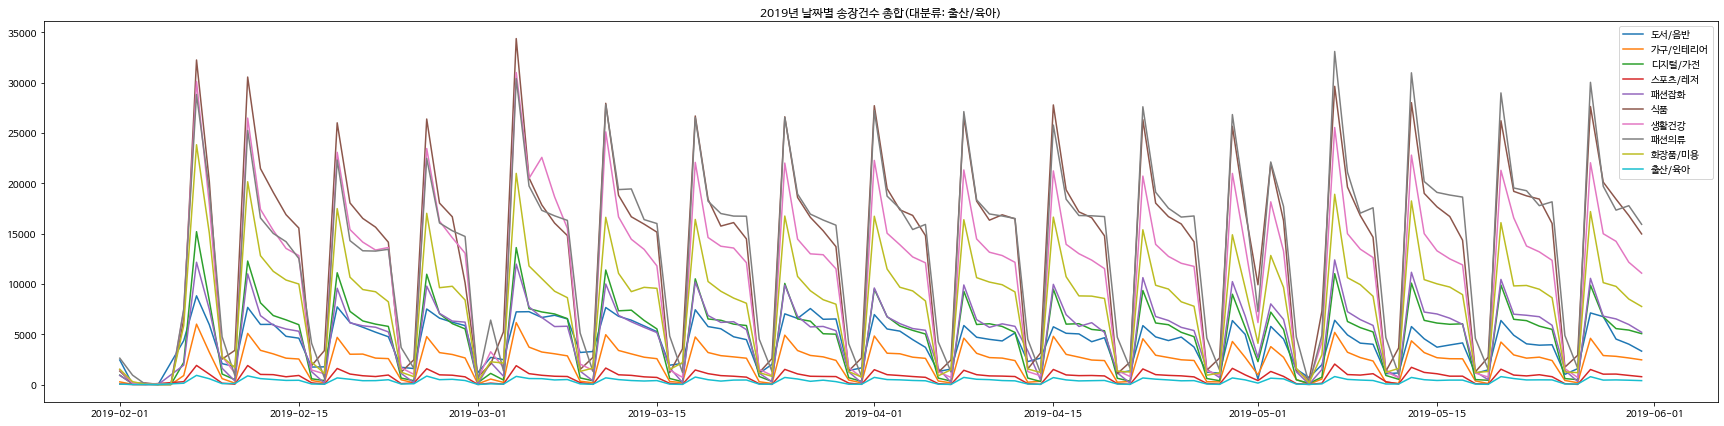

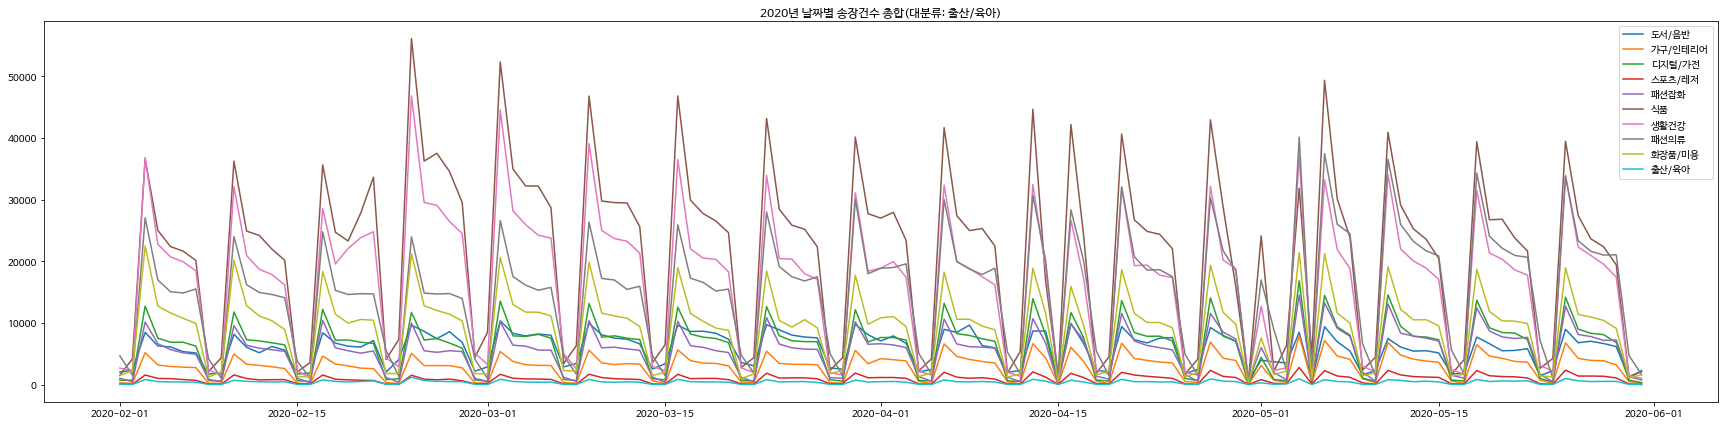

In [ ]:
cols = ['DL_YMD', 'DL_GD_LCLS_NM', 'INVC_CONT']

mean_cnt_ymd_lcls = CJ_Logistics.loc[:, cols].groupby(['DL_YMD', 'DL_GD_LCLS_NM']).sum()

mean_cnt_ymd_lcls['DL_YMD'] = [i[0] for i in mean_cnt_ymd_lcls.index]
mean_cnt_ymd_lcls['DL_GD_LCLS_NM'] = [i[1] for i in mean_cnt_ymd_lcls.index]
idx = CJ_Logistics['DL_GD_LCLS_NM'].unique()

rows_19 = mean_cnt_ymd_lcls['DL_YMD'].astype(str).str.slice(0, 4) == '2019'
rows_20 = mean_cnt_ymd_lcls['DL_YMD'].astype(str).str.slice(0, 4) == '2020'

for i in CJ_Logistics['DL_GD_LCLS_NM'].unique():
    rows = (mean_cnt_ymd_lcls['DL_GD_LCLS_NM'] == i)
    
    plt.plot(mean_cnt_ymd_lcls.loc[rows & rows_19, 'DL_YMD'], mean_cnt_ymd_lcls.loc[rows & rows_19, 'INVC_CONT'])
    
    plt.title('2019년 날짜별 송장건수 총합(대분류: ' + i + ')')
    plt.legend(idx)
  
plt.show()

for i in CJ_Logistics['DL_GD_LCLS_NM'].unique():
    rows = (mean_cnt_ymd_lcls['DL_GD_LCLS_NM'] == i)
    
    plt.plot(mean_cnt_ymd_lcls.loc[rows & rows_20, 'DL_YMD'], mean_cnt_ymd_lcls.loc[rows & rows_20, 'INVC_CONT'])
    
    plt.title('2020년 날짜별 송장건수 총합(대분류: ' + i + ')')
    plt.legend(idx)
  
plt.show()



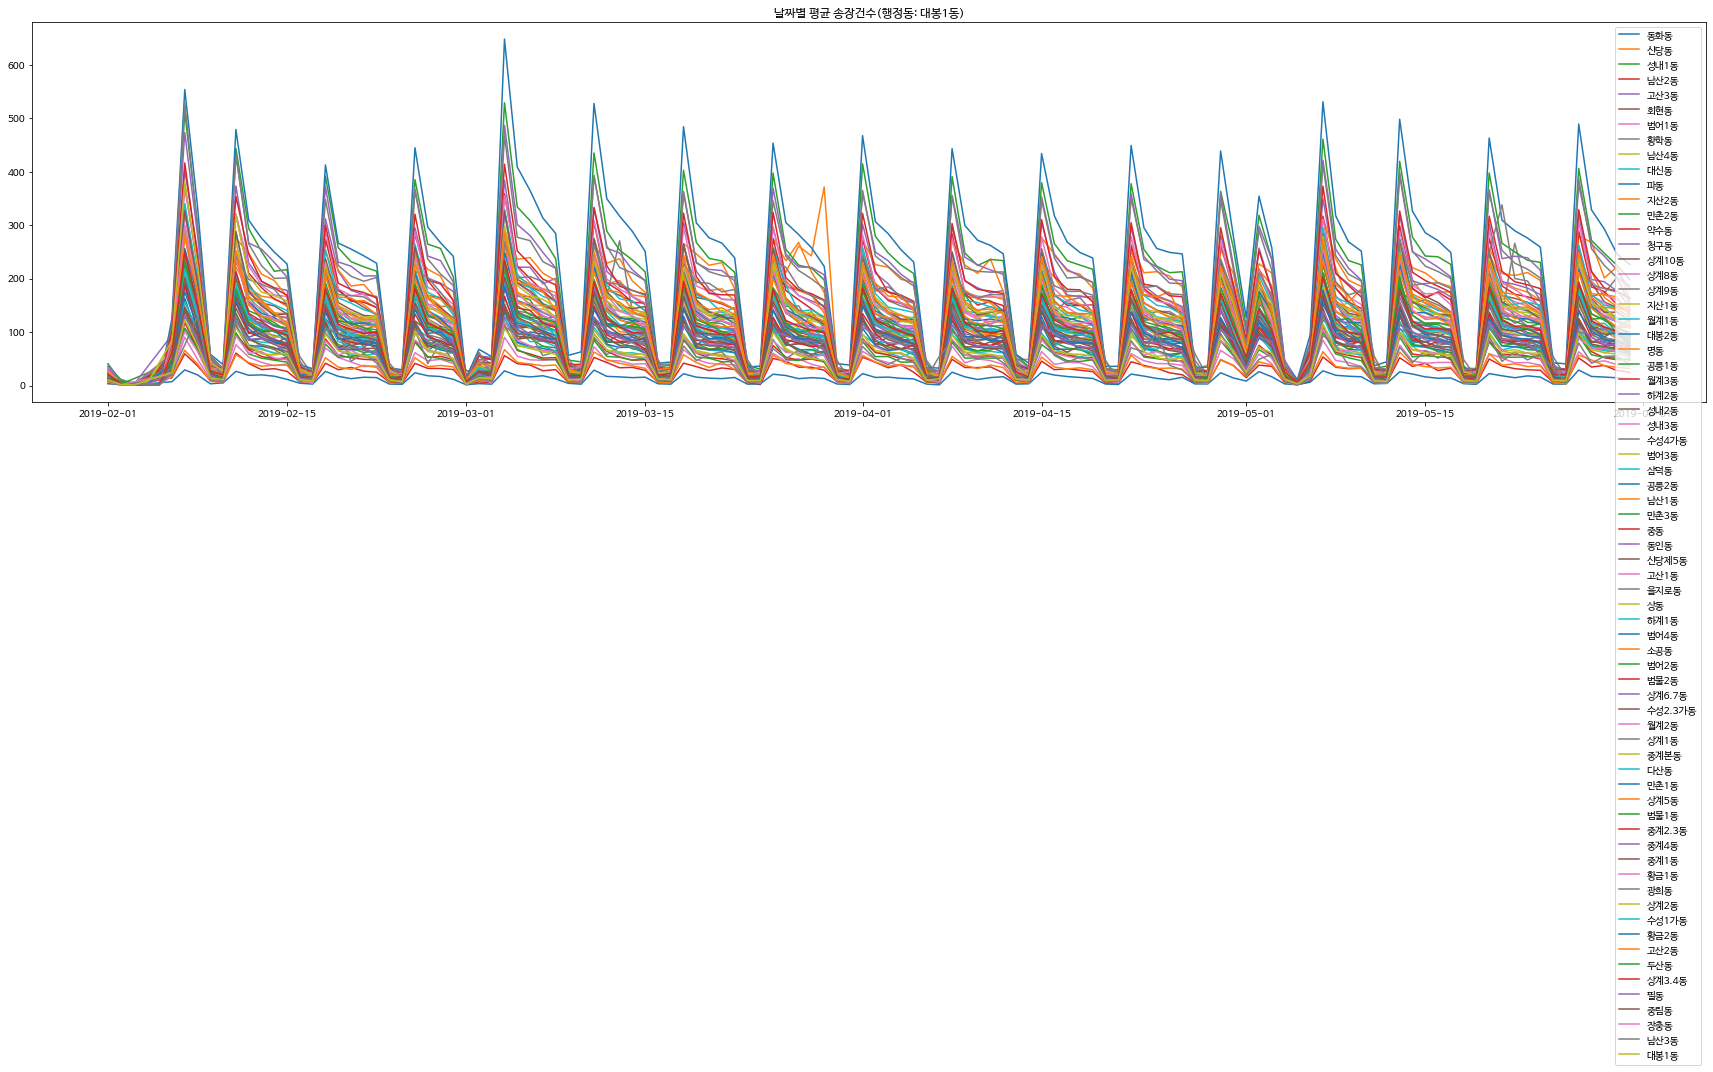

In [ ]:
cols = ['DL_YMD', 'HDNG_NM', 'INVC_CONT']

mean_cnt_ymd_hdng = CJ_Logistics.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).mean()

mean_cnt_ymd_hdng['DL_YMD'] = [i[0] for i in mean_cnt_ymd_hdng.index]
mean_cnt_ymd_hdng['HDNG_NM'] = [i[1] for i in mean_cnt_ymd_hdng.index]

idx = CJ_Logistics['HDNG_NM'].unique()

rows_19 = mean_cnt_ymd_hdng['DL_YMD'].astype(str).str.slice(0, 4) == '2019'
rows_20 = mean_cnt_ymd_hdng['DL_YMD'].astype(str).str.slice(0, 4) == '2019'

for i in CJ_Logistics['HDNG_NM'].unique():
    rows = (mean_cnt_ymd_hdng['HDNG_NM'] == i)
    
    plt.plot(mean_cnt_ymd_hdng.loc[rows & rows_19, 'DL_YMD'], mean_cnt_ymd_hdng.loc[rows & rows_19, 'INVC_CONT'])
    
    plt.title('날짜별 평균 송장건수(행정동: ' + i + ')')

    plt.legend(idx)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(1)

from sklearn.cluster import KMeans

from sklearn.preprocessing import minmax_scale

In [ ]:
print(len(CJ_Logistics))

156571


In [ ]:
CJ_Logistics.loc[CJ_Logistics['STD_Y'] == '19',:]

Unnamed: 0     DL_YMD DL_GD_LCLS_NM  ...  STD_Y STD_M  STD_D
0               0 2019-02-01         도서/음반  ...     19    02     01
1               1 2019-02-01       가구/인테리어  ...     19    02     01
2               2 2019-02-01       가구/인테리어  ...     19    02     01
3               3 2019-02-01         도서/음반  ...     19    02     01
4               4 2019-02-01        디지털/가전  ...     19    02     01
...           ...        ...           ...  ...    ...   ...    ...
76887       76887 2019-05-31          패션잡화  ...     19    05     31
76888       76888 2019-05-31        화장품/미용  ...     19    05     31
76889       76889 2019-05-31        화장품/미용  ...     19    05     31
76890       76890 2019-05-31          패션의류  ...     19    05     31
76891       76891 2019-05-31          패션잡화  ...     19    05     31

[76892 rows x 14 columns]

In [ ]:
data_19 = CJ_Logistics.loc[CJ_Logistics['STD_Y'] == '19',:]
data_19.fillna(0)
data_19.dtypes

Unnamed: 0                int64
DL_YMD           datetime64[ns]
DL_GD_LCLS_NM            object
DL_GD_LCLS_CD             int64
CTPV_NM                  object
CTPV_CD                   int64
CTGG_NM                  object
CTGG_CD                   int64
HDNG_NM                  object
HDNG_CD                   int64
INVC_CONT                 int64
STD_Y                    object
STD_M                    object
STD_D                    object
dtype: object

In [ ]:
data_19['days'] = 0
for i in range(76892):
  if data_19['STD_M'][i] == '02':
    data_19['days'][i] = 0
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '03':
    data_19['days'][i] = 28
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '04':
    data_19['days'][i] = 28 + 31
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '05':
    data_19['days'][i] = 28 + 31 + 30
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
    
data_19




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Unnamed: 0     DL_YMD DL_GD_LCLS_NM  ...  STD_M STD_D  days
0               0 2019-02-01         도서/음반  ...     02    01     1
1               1 2019-02-01       가구/인테리어  ...     02    01     1
2               2 2019-02-01       가구/인테리어  ...     02    01     1
3               3 2019-02-01         도서/음반  ...     02    01     1
4               4 2019-02-01        디지털/가전  ...     02    01     1
...           ...        ...           ...  ...    ...   ...   ...
76887       76887 2019-05-31          패션잡화  ...     05    31   120
76888       76888 2019-05-31        화장품/미용  ...     05    31   120
76889       76889 2019-05-31        화장품/미용  ...     05    31   120
76890       76890 2019-05-31          패션의류  ...     05    31   120
76891       76891 2019-05-31          패션잡화  ...     05    31   120

[76892 rows x 15 columns]

In [ ]:
import math

data_19['3'] = 3
data_19['7'] = 7
data_19['days'] = data_19['days'] - data_19['3']
data_19 = data_19.loc[data_19['days']>=0,:]
data_19 = data_19.loc[data_19['days']<=111,:]
data_19['WEEK'] = (data_19['days'] / data_19['7']).astype(int) + 1
data_19['DAY'] = data_19['days'] % data_19['7']
"""
data_19['WEEK'] = 0
data_19['DAY'] = -1
"""

"""
int j = 3

while j < 119:
  for i in range(76892):
    if data_19['days'][i] == j:
      data_19['WEEK'][i] = math.floor((j-3)/7) + 1
      data_19['DAY'][i] = (j-3)%7

  j = j + 1
"""

data_19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Unnamed: 0     DL_YMD DL_GD_LCLS_NM  DL_GD_LCLS_CD  ...  3  7 WEEK  DAY
944           944 2019-02-03            식품             17  ...  3  7    1    0
945           945 2019-02-03       가구/인테리어             10  ...  3  7    1    0
946           946 2019-02-03          생활건강             15  ...  3  7    1    0
947           947 2019-02-03            식품             17  ...  3  7    1    0
948           948 2019-02-03          생활건강             15  ...  3  7    1    0
...           ...        ...           ...            ...  ... .. ..  ...  ...
72886       72886 2019-05-25        화장품/미용             21  ...  3  7   16    6
72887       72887 2019-05-25          패션의류             19  ...  3  7   16    6
72888       72888 2019-05-25        화장품/미용             21  ...  3  7   16    6
72889       72889 2019-05-25          패션잡화             20  ...  3  7   16    6
72890       72890 2019-05-25        화장품/미용             21  ...  3  7   16    6

[71947 rows x 19 columns]

In [ ]:
week_01 = data_19.loc[data_19['WEEK'] == 1, :]
week_02 = data_19.loc[data_19['WEEK'] == 2, :]
week_03 = data_19.loc[data_19['WEEK'] == 3, :]
week_04 = data_19.loc[data_19['WEEK'] == 4, :]
week_05 = data_19.loc[data_19['WEEK'] == 5, :]
week_06 = data_19.loc[data_19['WEEK'] == 6, :]
week_07 = data_19.loc[data_19['WEEK'] == 7, :]
week_08 = data_19.loc[data_19['WEEK'] == 8, :]
week_09 = data_19.loc[data_19['WEEK'] == 9, :]
week_10 = data_19.loc[data_19['WEEK'] == 10, :]
week_11 = data_19.loc[data_19['WEEK'] == 11, :]
week_12 = data_19.loc[data_19['WEEK'] == 12, :]
week_13 = data_19.loc[data_19['WEEK'] == 13, :]
week_14 = data_19.loc[data_19['WEEK'] == 14, :]
week_15 = data_19.loc[data_19['WEEK'] == 15, :]
week_16 = data_19.loc[data_19['WEEK'] == 16, :]

print(week_01.head())
print(week_02.head())
print(week_03.head())
print(week_04.head())
print(week_05.head())
print(week_06.head())
print(week_07.head())
print(week_08.head())
print(week_09.head())
print(week_10.head())
print(week_11.head())
print(week_12.head())
print(week_13.head())
print(week_14.head())
print(week_15.head())
print(week_16.head())


     Unnamed: 0     DL_YMD DL_GD_LCLS_NM  DL_GD_LCLS_CD  ...  3  7 WEEK  DAY
944         944 2019-02-03            식품             17  ...  3  7    1    0
945         945 2019-02-03       가구/인테리어             10  ...  3  7    1    0
946         946 2019-02-03          생활건강             15  ...  3  7    1    0
947         947 2019-02-03            식품             17  ...  3  7    1    0
948         948 2019-02-03          생활건강             15  ...  3  7    1    0

[5 rows x 19 columns]
      Unnamed: 0     DL_YMD DL_GD_LCLS_NM  DL_GD_LCLS_CD  ...  3  7 WEEK  DAY
3956        3956 2019-02-10       가구/인테리어             10  ...  3  7    2    0
3957        3957 2019-02-10       가구/인테리어             10  ...  3  7    2    0
3958        3958 2019-02-10       가구/인테리어             10  ...  3  7    2    0
3959        3959 2019-02-10         도서/음반             12  ...  3  7    2    0
3960        3960 2019-02-10        디지털/가전             13  ...  3  7    2    0

[5 rows x 19 columns]
      Unnamed: 0     DL_

In [ ]:
period_01 = pd.concat([week_01, week_02, week_03, week_04], axis = 0)
period_02 = pd.concat([week_05, week_06, week_07, week_08], axis = 0)
period_03 = pd.concat([week_09, week_10, week_11, week_12], axis = 0)
period_04 = pd.concat([week_13, week_14, week_15, week_16], axis = 0)


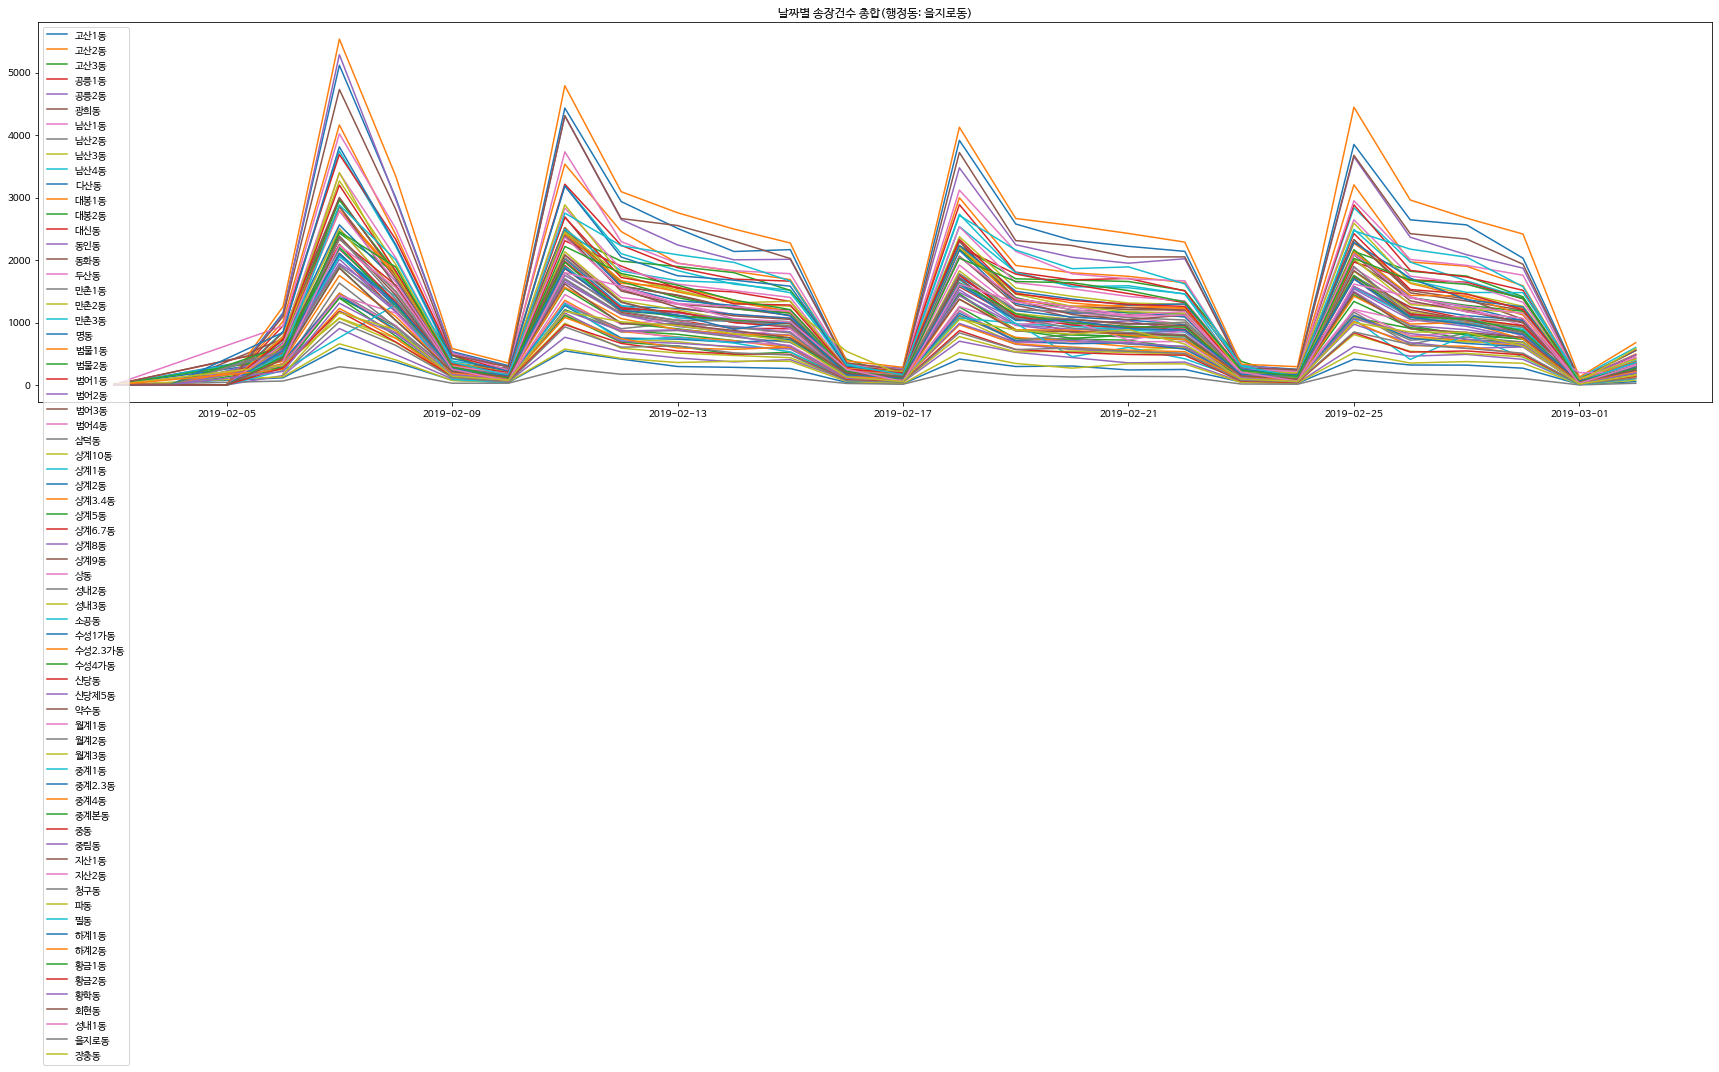

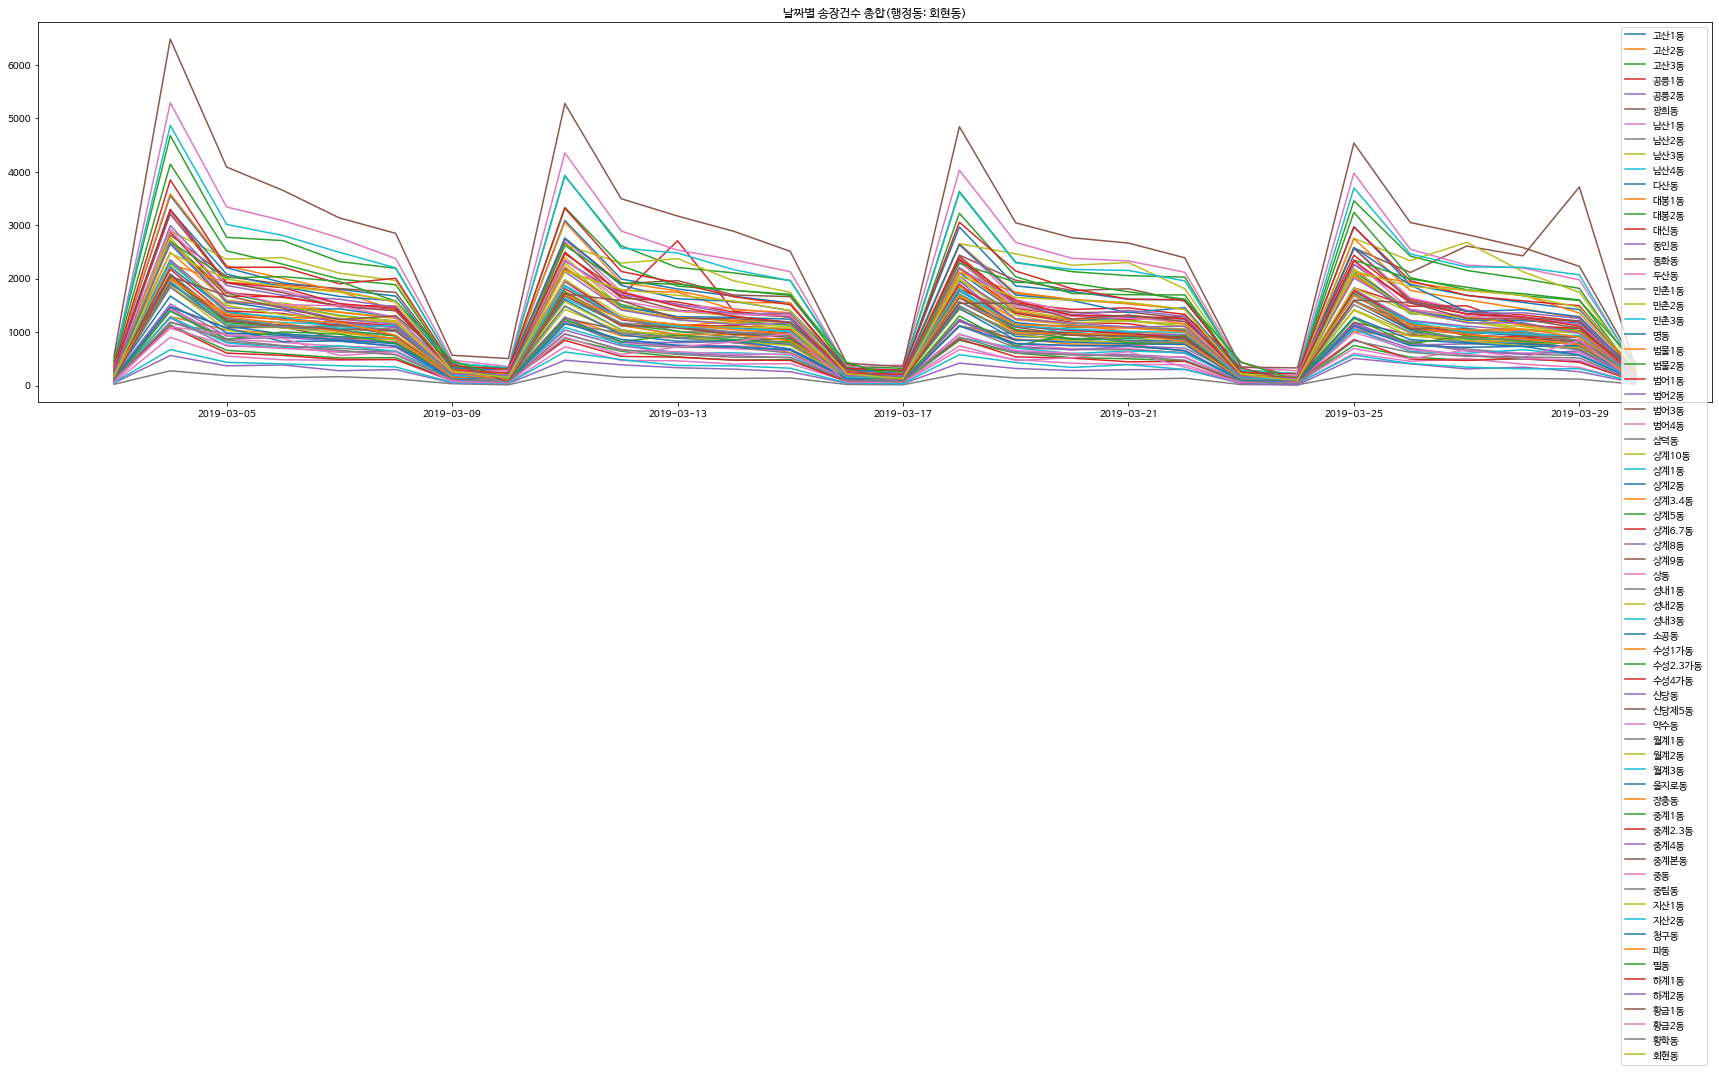

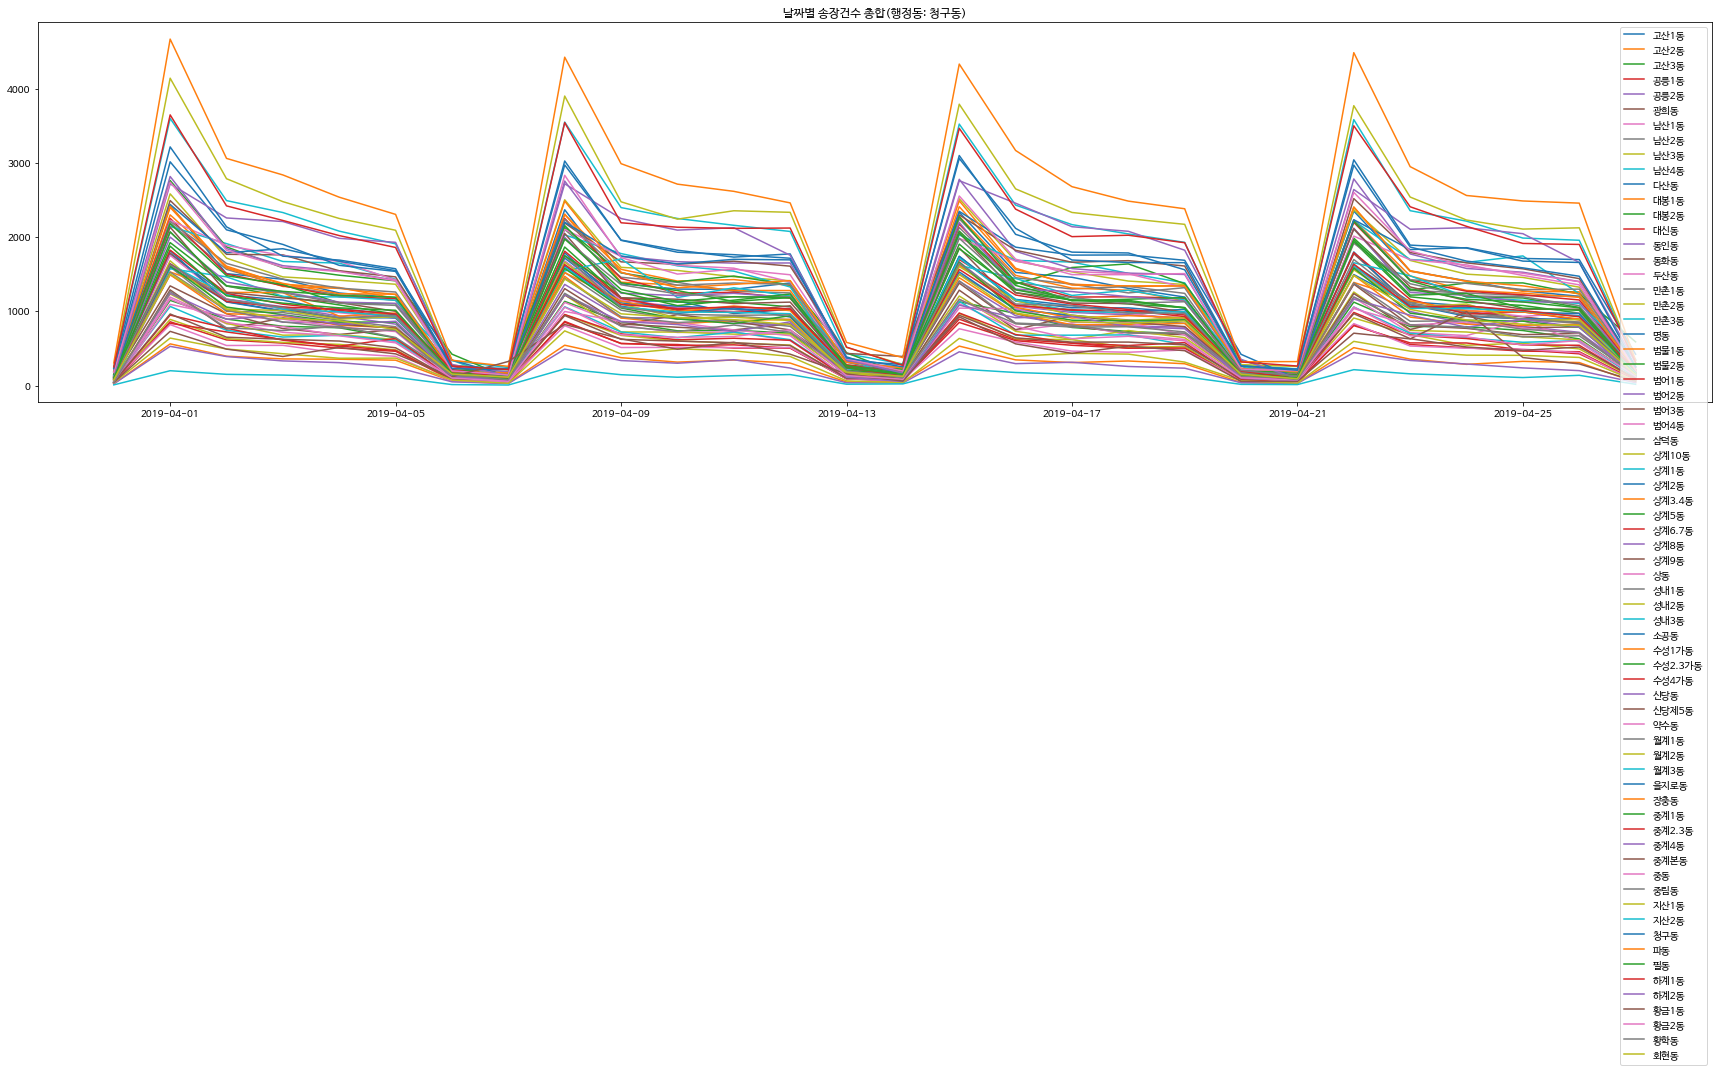

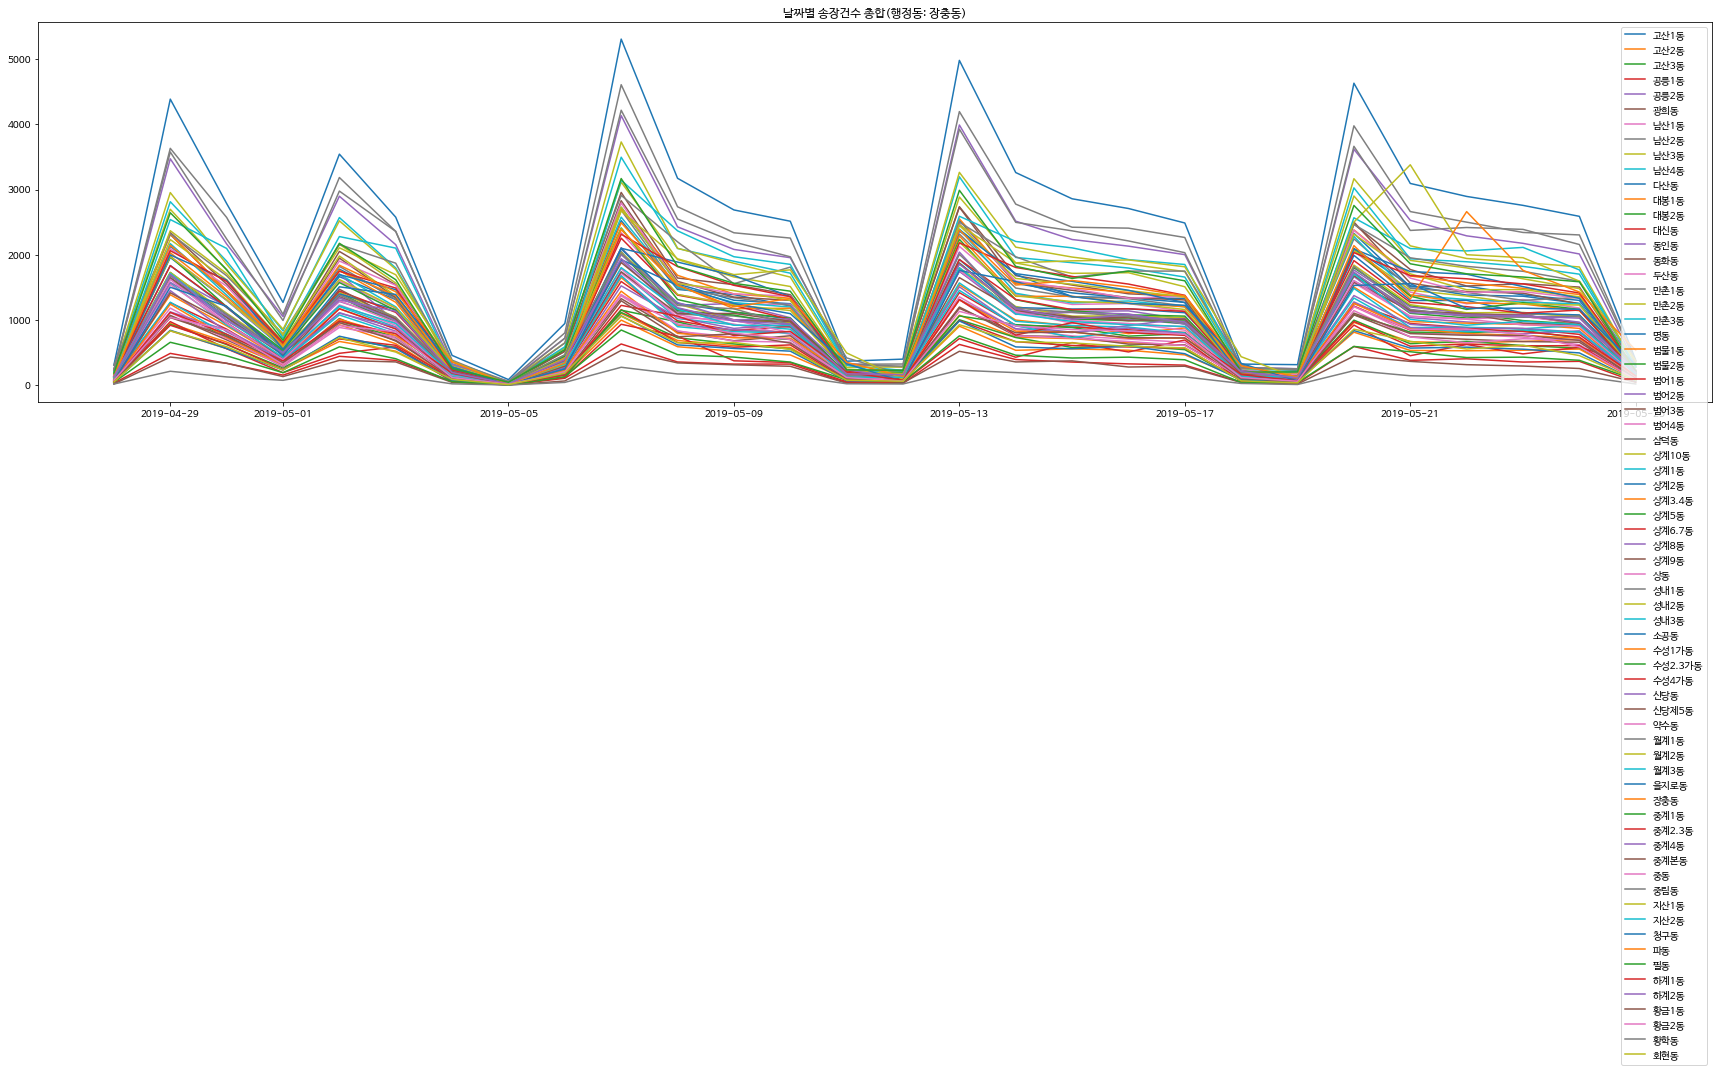

In [ ]:
cols = ['DL_YMD', 'HDNG_NM', 'INVC_CONT']

weeksum_01 = period_01.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).sum()

weeksum_01['DL_YMD'] = [i[0] for i in weeksum_01.index]
weeksum_01['HDNG_NM'] = [i[1] for i in weeksum_01.index]

idx1 = weeksum_01['HDNG_NM'].unique()

for i in period_01['HDNG_NM'].unique():
    rows = (weeksum_01['HDNG_NM'] == i)
    
    plt.plot(weeksum_01.loc[rows, 'DL_YMD'], weeksum_01.loc[rows, 'INVC_CONT'])
    
    plt.title('날짜별 송장건수 총합(행정동: ' + i + ')')

    plt.legend(idx1)

plt.show()

weeksum_02 = period_02.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).sum()

weeksum_02['DL_YMD'] = [i[0] for i in weeksum_02.index]
weeksum_02['HDNG_NM'] = [i[1] for i in weeksum_02.index]

idx2 = weeksum_02['HDNG_NM'].unique()

for i in period_02['HDNG_NM'].unique():
    rows = (weeksum_02['HDNG_NM'] == i)
    
    plt.plot(weeksum_02.loc[rows, 'DL_YMD'], weeksum_02.loc[rows, 'INVC_CONT'])
    
    plt.title('날짜별 송장건수 총합(행정동: ' + i + ')')

    plt.legend(idx2)

plt.show()

weeksum_03 = period_03.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).sum()

weeksum_03['DL_YMD'] = [i[0] for i in weeksum_03.index]
weeksum_03['HDNG_NM'] = [i[1] for i in weeksum_03.index]

idx3 = weeksum_03['HDNG_NM'].unique()

for i in period_03['HDNG_NM'].unique():
    rows = (weeksum_03['HDNG_NM'] == i)
    
    plt.plot(weeksum_03.loc[rows, 'DL_YMD'], weeksum_03.loc[rows, 'INVC_CONT'])
    
    plt.title('날짜별 송장건수 총합(행정동: ' + i + ')')

    plt.legend(idx3)

plt.show()

weeksum_04 = period_04.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).sum()

weeksum_04['DL_YMD'] = [i[0] for i in weeksum_04.index]
weeksum_04['HDNG_NM'] = [i[1] for i in weeksum_04.index]

idx4 = weeksum_04['HDNG_NM'].unique()

for i in period_04['HDNG_NM'].unique():
    rows = (weeksum_04['HDNG_NM'] == i)
    
    plt.plot(weeksum_04.loc[rows, 'DL_YMD'], weeksum_04.loc[rows, 'INVC_CONT'])
    
    plt.title('날짜별 송장건수 총합(행정동: ' + i + ')')

    plt.legend(idx4)

plt.show()

In [ ]:
weeksum_01.index[0]
x[0]

(numpy.datetime64('2019-02-03T00:00:00.000000000'), '고산1동')

In [ ]:
#print("pandas version: ", pd.__version__)
#pd.set_option('display.max_row', 100)
#pd.set_option('display.max_columns', 100)
#weeksum_01.fillna(0)
x = []
for i in weeksum_01['DL_YMD'].unique():
  for j in weeksum_01['HDNG_NM'].unique():
    x.append((i,j))

for i in x:
  if weeksum_01.index
len(x)
#weeksum_01['HDNG_NM'].unique()

#weeksum01 = weeksum_01.resample('D', axis = 'HDNG_NM').first()



SyntaxError: ignored

In [ ]:
weeksum_02.fillna(0)
weeksum_02.head()

INVC_CONT     DL_YMD HDNG_NM
DL_YMD     HDNG_NM                              
2019-03-03 고산1동           358 2019-03-03    고산1동
           고산2동           283 2019-03-03    고산2동
           고산3동           356 2019-03-03    고산3동
           공릉1동           444 2019-03-03    공릉1동
           공릉2동           540 2019-03-03    공릉2동

In [ ]:
weeksum_03.fillna(0)
len(weeksum_03)

1932

In [ ]:
weeksum_04.fillna(0)
len(weeksum_04)

1932

In [ ]:
W1 = weeksum_01.reset_index(drop=True)
W01 = pd.DataFrame()
for i in W1['HDNG_NM'].unique():
  pd.set_option('display.max_row', 100)
  pd.set_option('display.max_columns', 100)
  rows = (W1['HDNG_NM'] == i)
  W01 = W01.append(W1.loc[rows, :].iloc[:,0:2], ignore_index = True)
  W001 = W1.loc[rows, :].iloc[:,0:3].reset_index(drop=True)
  print(W001)

#0203 성내1동, 을지로동, 장충동
#0204 고산3동, 남산1동, 남산2동, 남산3동, 대봉 1동, 대봉2동,동화동, 두산동, 만촌3동, 범물1동, 범물2동, 범어1동, 범어3동, 상계10동, 상계9동, 성내2동, 성내3동, 신당동, 월계1동, 중계4동, 청구동, 파동, 황학동, 성내1동, 을지로동, 장충동
#0205 고산3동, 광희동, 남산1동, 남산2동, 남산4동, 대봉1동, 대봉2동, 대신동, 동인동, 동화동, 만촌2동, 범물1동, 범물2동, 범어3동, 범어4동, 삼덕동, 상계2동, 성내2동, 수성2.3가동, 신당동, 약수동, 중계4동, 중계본동, 지산2동, 파동, 필동, 황금2동, 황학동, 성내1동, 을지로동, 장충동

    INVC_CONT     DL_YMD HDNG_NM
0          10 2019-02-03    고산1동
1           2 2019-02-04    고산1동
2           1 2019-02-05    고산1동
3         948 2019-02-06    고산1동
4        3689 2019-02-07    고산1동
5        2329 2019-02-08    고산1동
6         479 2019-02-09    고산1동
7         224 2019-02-10    고산1동
8        3214 2019-02-11    고산1동
9        2236 2019-02-12    고산1동
10       1878 2019-02-13    고산1동
11       1695 2019-02-14    고산1동
12       1663 2019-02-15    고산1동
13        285 2019-02-16    고산1동
14        230 2019-02-17    고산1동
15       2887 2019-02-18    고산1동
16       1807 2019-02-19    고산1동
17       1682 2019-02-20    고산1동
18       1706 2019-02-21    고산1동
19       1506 2019-02-22    고산1동
20        274 2019-02-23    고산1동
21        198 2019-02-24    고산1동
22       2884 2019-02-25    고산1동
23       1835 2019-02-26    고산1동
24       1729 2019-02-27    고산1동
25       1516 2019-02-28    고산1동
26         76 2019-03-01    고산1동
27        479 2019-03-02    고산1동
    INVC_CONT     DL_YMD HDNG_NM
0         

In [ ]:
#0203 성내1동, 을지로동, 장충동
#0204 고산3동, 남산1동, 남산2동, 남산3동, 대봉 1동, 대봉2동,동화동, 두산동, 만촌3동, 범물1동, 범물2동, 범어1동, 범어3동, 상계10동, 상계9동, 성내2동, 성내3동, 신당동, 월계1동, 
#중계4동, 청구동, 파동, 황학동, 성내1동, 을지로동, 장충동
#0205 고산3동, 광희동, 남산1동, 남산2동, 남산4동, 대봉1동, 대봉2동, 대신동, 동인동, 동화동, 만촌2동, 
#범물1동, 범물2동, 범어3동, 범어4동, 삼덕동, 상계2동, 성내2동, 수성2.3가동, 신당동, 약수동, 중계4동, 중계본동, 지산2동, 파동, 필동, 황금2동, 황학동, 성내1동, 을지로동, 장충동
from datetime import date

weeksum_01 = weeksum_01.reset_index(drop=True)

Dat = ['190203', '190204', '190205']
#Dat = [datetime.datetime.striptime('2019-02-03', "%Y-%m-%d"), datetime.datetime.striptime('2019-02-04', "%Y-%m-%d"), datetime.datetime.striptime('2019-02-05', "%Y-%m-%d")]
DNG3 = ['성내1동','을지로동','장충동']
DNG4 = ['고산3동', '남산1동', '남산2동', '남산3동', '대봉1동', '대봉2동','동화동', '두산동', '만촌3동', '범물1동', '범물2동', '범어1동', '범어3동', '상계10동', '상계9동', '성내2동', '성내3동', '신당동', '월계1동', '중계4동', '청구동', '파동', '황학동', '성내1동', '을지로동', '장충동']
DNG5 = ['고산3동','광희동','남산1동','남산2동','남산4동','대봉1동','대봉2동','대신동','동인동','동화동','만촌2동','범물1동','범물2동','범어3동','범어4동','삼덕동','상계2동','성내2동','수성2.3가동','신당동','약수동','중계4동','중계본동','지산2동','파동','필동','황금2동','황학동','성내1동','을지로동','장충동']

weeks_01 = pd.DataFrame()
for i in DNG3:
  weeks_01 = weeks_01.append({'DL_YMD': Dat[0], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

for i in DNG4:
  weeks_01 = weeks_01.append({'DL_YMD': Dat[1], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

for i in DNG5:
  weeks_01 = weeks_01.append({'DL_YMD': Dat[2], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

weeks_01['STD_Y'] = weeks_01['DL_YMD'].astype(str).str.slice(0, 2)
weeks_01['STD_M'] = weeks_01['DL_YMD'].astype(str).str.slice(2, 4)
weeks_01['STD_D'] = weeks_01['DL_YMD'].astype(str).str.slice(4, 6)

weeks_01['DL_YMD'] = pd.to_datetime('20' + weeks_01['STD_Y'] + '-' + weeks_01['STD_M'] + '-' + weeks_01['STD_D'])
weeks_01 = weeks_01.iloc[:,:3]

weeksum_01 = pd.concat([weeksum_01, weeks_01], axis = 0)
weeksum_01 = weeksum_01.loc[:, cols].groupby(['DL_YMD', 'HDNG_NM']).sum()

weeksum_01['DL_YMD'] = [i[0] for i in weeksum_01.index]
weeksum_01['HDNG_NM'] = [i[1] for i in weeksum_01.index]

weeksum_01
#for i in DNG3:
#  weeksum_01 = weeksum_01.append({'DL_YMD': Dat[0], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

#for i in DNG4:
#  weeksum_01 = weeksum_01.append({'DL_YMD': Dat[1], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

#for i in DNG5:
#  weeksum_01 = weeksum_01.append({'DL_YMD': Dat[2], 'HDNG_NM':i, 'INVC_CONT': 0}, ignore_index = True)

#weeksum_01
#weeksum_01.append[[0, "2019-02-03", '성내1동'], [0, "2019-02-03", '을지로동'], [0, "2019-02-03", '장충동'], [0, "2019-02-04", '고산3동'], ]

INVC_CONT     DL_YMD HDNG_NM
DL_YMD     HDNG_NM                              
2019-02-03 고산1동          10.0 2019-02-03    고산1동
           고산2동           5.0 2019-02-03    고산2동
           고산3동           6.0 2019-02-03    고산3동
           공릉1동          22.0 2019-02-03    공릉1동
           공릉2동          15.0 2019-02-03    공릉2동
...                       ...        ...     ...
2019-03-02 하계2동         291.0 2019-03-02    하계2동
           황금1동         430.0 2019-03-02    황금1동
           황금2동         219.0 2019-03-02    황금2동
           황학동          266.0 2019-03-02     황학동
           회현동          300.0 2019-03-02     회현동

[1932 rows x 3 columns]

In [ ]:
p1 = []
for i in weeksum_01['HDNG_NM'].unique():
  rows = (weeksum_01['HDNG_NM']==i)
  p1.append(np.array(weeksum_01.loc[rows, 'INVC_CONT'].transpose().tolist()))

p2 = []
for i in weeksum_02['HDNG_NM'].unique():
  rows = (weeksum_02['HDNG_NM']==i)
  p2.append(np.array(weeksum_02.loc[rows, 'INVC_CONT'].transpose().tolist()))

p3 = []
for i in weeksum_03['HDNG_NM'].unique():
  rows = (weeksum_03['HDNG_NM']==i)
  p3.append(np.array(weeksum_03.loc[rows, 'INVC_CONT'].transpose().tolist()))

p4 = []
for i in weeksum_04['HDNG_NM'].unique():
  rows = (weeksum_04['HDNG_NM']==i)
  p4.append(np.array(weeksum_04.loc[rows, 'INVC_CONT'].transpose().tolist()))
#  p1 = p1.append(weeksum_01.loc[rows, 'INVC_CONT'].tolist())
#  P1 = P1.append(weeksum_01.loc[rows, 'INVC_CONT'], ignore_index = True)
#P1.values
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)
p0 = p1 + p2 + p3 + p4

In [ ]:
P0 = pd.DataFrame(p0)
#P1 = pd.DataFrame(p1)
#P2 = pd.DataFrame(p2)
#P3 = pd.DataFrame(p3)
#P4 = pd.DataFrame(p4)
P0
#P1.values
#P2.values
#P3.values
#P4.values


0        1       2       3        4        5       6       7   \
0    772.0   9068.0  5817.0  5240.0   9196.0   6988.0  1395.0   735.0   
1    590.0   7407.0  4966.0  4325.0   7589.0   5777.0  1041.0   551.0   
2    767.0   9674.0  6215.0  5896.0  10114.0   7848.0  1478.0   807.0   
3    954.0  13072.0  8706.0  7806.0  13315.0   9823.0  1650.0   941.0   
4   1171.0  15546.0  9938.0  9013.0  14752.0  11072.0  1950.0  1202.0   
5    365.0   7497.0  5517.0  5095.0   8162.0   6614.0  1649.0   420.0   
6    111.0   1724.0  1167.0  1053.0   1830.0   1475.0   241.0   130.0   
7     88.0   1524.0  1098.0   966.0   1562.0   1273.0   221.0   105.0   
8    151.0   2806.0  2008.0  1701.0   2325.0   2932.0   337.0   431.0   
9    230.0   3090.0  1998.0  1883.0   3082.0   2532.0   438.0   259.0   
10   387.0   5199.0  3543.0  3184.0   5625.0   4175.0   925.0   330.0   
11   231.0   2956.0  2043.0  1806.0   3176.0   2456.0   430.0   276.0   
12    53.0    691.0   465.0   428.0    814.0    584.0    99.0    56.0   
13   208.0   3183.0  2235.0  1931.0   3276.0   2664.0   456.0   221.0   
14   325.0   4838.0  3475.0  3211.0   5457.0   4378.0   796.0   291.0   
15   197.0   3800.0  2407.0  2573.0   4408.0   3281.0   785.0   250.0   
16   451.0   5796.0  3778.0  3393.0   6284.0   4579.0   764.0   404.0   
17   525.0   6527.0  4339.0  4013.0   6809.0   5404.0   962.0   567.0   
18   270.0   3697.0  2425.0  2179.0   3895.0   2823.0   567.0   260.0   
19   498.0   5692.0  3554.0  3345.0   5622.0   4274.0   886.0   545.0   
20   397.0   8155.0  6721.0  5814.0   9250.0   8001.0  1215.0   497.0   
21   227.0   2767.0  1709.0  1666.0   2664.0   2087.0   371.0   232.0   
22   425.0   4291.0  2732.0  2508.0   4499.0   3364.0   637.0   336.0   
23   442.0   5345.0  3180.0  3075.0   5251.0   4115.0   770.0   457.0   
24   526.0   6030.0  4042.0  3617.0   6299.0   4726.0   870.0   512.0   
25   466.0   5470.0  3415.0  3193.0   5647.0   4394.0   701.0   424.0   
26   512.0   5243.0  3184.0  2996.0   5029.0   3938.0   720.0   589.0   
27   192.0   3677.0  2658.0  2223.0   3871.0   2949.0   463.0   177.0   
28   401.0   4835.0  2970.0  2618.0   4269.0   3232.0   599.0   341.0   
29   956.0  11797.0  7364.0  7113.0  12524.0   9183.0  1530.0   882.0   
30   510.0   7303.0  5038.0  4556.0   8644.0   6507.0  1129.0   578.0   
31   464.0   5909.0  3801.0  3651.0   6108.0   4563.0   831.0   499.0   
32   502.0   6730.0  4231.0  4047.0   6915.0   5219.0   897.0   548.0   
33   945.0  12045.0  7750.0  7230.0  12279.0   9281.0  1620.0   905.0   
34   610.0   7957.0  4882.0  4492.0   7683.0   5682.0   926.0   595.0   
35   503.0   7613.0  4996.0  4491.0   8215.0   6036.0  1435.0   500.0   
36   465.0   5249.0  3351.0  3106.0   5412.0   4050.0   663.0   379.0   
37   200.0   5117.0  4356.0  3478.0   6172.0   5409.0  1293.0   208.0   
38   180.0   3842.0  2818.0  2752.0   4247.0   3780.0   614.0   207.0   
39   133.0   2202.0  1498.0  1257.0   2335.0   1755.0   304.0   131.0   
40   384.0   6419.0  5458.0  4551.0   7564.0   6193.0  1007.0   383.0   
41   460.0   5364.0  3422.0  3236.0   5605.0   4145.0   792.0   442.0   
42   334.0   3945.0  2491.0  2257.0   3961.0   3089.0   556.0   350.0   
43   438.0   4986.0  3011.0  2910.0   4859.0   3734.0   713.0   438.0   
44   568.0   7635.0  5488.0  4908.0   7571.0   6495.0  1228.0   319.0   
45   256.0   3968.0  2387.0  2305.0   4112.0   3103.0   724.0   267.0   
46   538.0   5560.0  3609.0  3364.0   5832.0   4533.0   869.0   481.0   
47   559.0   7829.0  4959.0  4498.0   7580.0   5829.0   953.0   594.0   
48   520.0   6754.0  4387.0  4005.0   6825.0   5120.0   942.0   597.0   
49   741.0   8974.0  5842.0  5147.0   9225.0   6818.0  1141.0   750.0   
50   156.0   3316.0  2670.0  2331.0   3772.0   3161.0   518.0   177.0   
51   205.0   2863.0  2164.0  1779.0   2932.0   2192.0   412.0   171.0   
52   821.0   7988.0  4958.0  4564.0   7981.0   5903.0  1123.0   717.0   
53   900.0  10318.0  6516.0  5890.0  10365.0   7645.0  1293.0   87

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(P0, axis=1, copy=True)
scaled_train

array([[0.00342339, 0.77100296, 0.47020725, ..., 0.50851221, 0.33715766,
        0.05505181],
       [0.00438104, 0.77016401, 0.49595596, ..., 0.53167827, 0.37620759,
        0.05223545],
       [0.        , 0.76369716, 0.46711824, ..., 0.5129898 , 0.34133585,
        0.05230215],
       ...,
       [0.00225014, 0.80948809, 0.49146822, ..., 0.54809676, 0.37877367,
        0.07087943],
       [0.0058733 , 0.7884212 , 0.47867431, ..., 0.55111173, 0.39393092,
        0.05971193],
       [0.00247862, 0.79489404, 0.63341182, ..., 0.71173627, 0.4906432 ,
        0.0848928 ]])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
res = model.fit(scaled_train)

In [ ]:
res.score(scaled_train)

-1.1903129447695466

In [ ]:
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

[-1.9338132954534046, -1.3954885252846214, -1.1903129447695466, -1.0200856912599932, -0.8922303087878349, -0.7843324582000912, -0.7268448378997947, -0.6442214760166527, -0.6221829366947818, -0.571194502173598, -0.5389508514156214, -0.5039386273110642, -0.4537845982506985, -0.4261485968589307, -0.4083385646678037, -0.38273691757355355, -0.3591575202844295, -0.3369763284385856, -0.3270739354604357, -0.3039809032294345, -0.2882601179524107, -0.26512117105354793, -0.2487328096532737, -0.24774807570180268, -0.21880333939115015, -0.21388443936589052, -0.19765038040712302, -0.1896573309928824]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


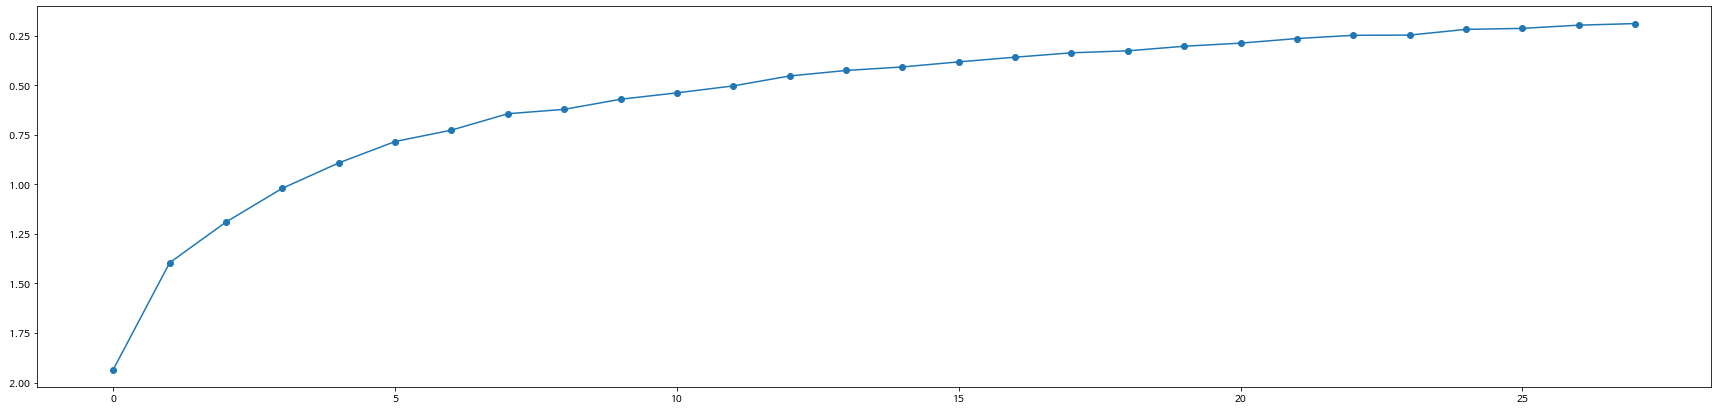

In [ ]:
plt.plot(score, marker = 'o')

In [ ]:
model = KMeans(n_clusters=4)

In [ ]:
res = model.fit(scaled_train)

In [ ]:
res.labels_

array([0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 1], dtype=int32)

In [ ]:
name = pd.DataFrame(weeksum_01['HDNG_NM'].unique()).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

name  cluster
0      고산1동        0
1      고산2동        0
2      고산3동        0
3      공릉1동        0
4      공릉2동        0
5       광희동        1
6      남산1동        2
7      남산2동        2
8      남산3동        3
9      남산4동        0
10      다산동        2
11     대봉1동        0
12     대봉2동        2
13      대신동        2
14      동인동        2
15      동화동        2
16      두산동        0
17     만촌1동        0
18     만촌2동        0
19     만촌3동        0
20       명동        1
21     범물1동        0
22     범물2동        0
23     범어1동        0
24     범어2동        0
25     범어3동        0
26     범어4동        0
27      삼덕동        2
28    상계10동        0
29     상계1동        0
30     상계2동        2
31   상계3.4동        0
32     상계5동        0
33   상계6.7동        0
34     상계8동        0
35     상계9동        2
36       상동        0
37     성내1동        1
38     성내2동        1
39     성내3동        2
40      소공동        1
41    수성1가동        0
42  수성2.3가동        0
43    수성4가동        0
44      신당동        1
45    신당제5동        2
46      약수동        0
47     월계1동        0
48     월계2동        0
49     월계3동        0
50     을지로동        1
51      장충동        2
52     중계1동        0
53   중계2.3동        0
54     중계4동        0
55     중계본동        0
56       중동        0
57      중림동        0
58     지산1동        0
59     지산2동        0
60      청구동        0
61       파동        0
62       필동        1
63     하계1동        0
64     하계2동        0
65     황금1동        0
66     황금2동        2
67      황학동        2
68      회현동        1

In [ ]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

       name  cluster         0         1         2         3         4  \
0      고산1동        0  0.003423  0.771003  0.470207  0.416821  0.782846   
1      고산2동        0  0.004381  0.770164  0.495956  0.423950  0.790609   
2      고산3동        0  0.000000  0.763697  0.467118  0.439767  0.801423   
3      공릉1동        0  0.000867  0.809381  0.518081  0.458033  0.825594   
4      공릉2동        0  0.000000  0.840201  0.512420  0.458355  0.793793   
5       광희동        1  0.000000  0.795982  0.575000  0.527902  0.870201   
6      남산1동        2  0.000000  0.751631  0.492078  0.438956  0.801025   
7      남산2동        2  0.001157  0.832176  0.585648  0.509259  0.854167   
8      남산3동        3  0.000000  0.802600  0.561366  0.468561  0.657195   
9      남산4동        0  0.000000  0.772347  0.477451  0.446395  0.770186   
10      다산동        2  0.009094  0.776803  0.512604  0.455329  0.844767   
11     대봉1동        0  0.000000  0.730759  0.485921  0.422365  0.789756   
12     대봉2동        2  0.000000  0.7427

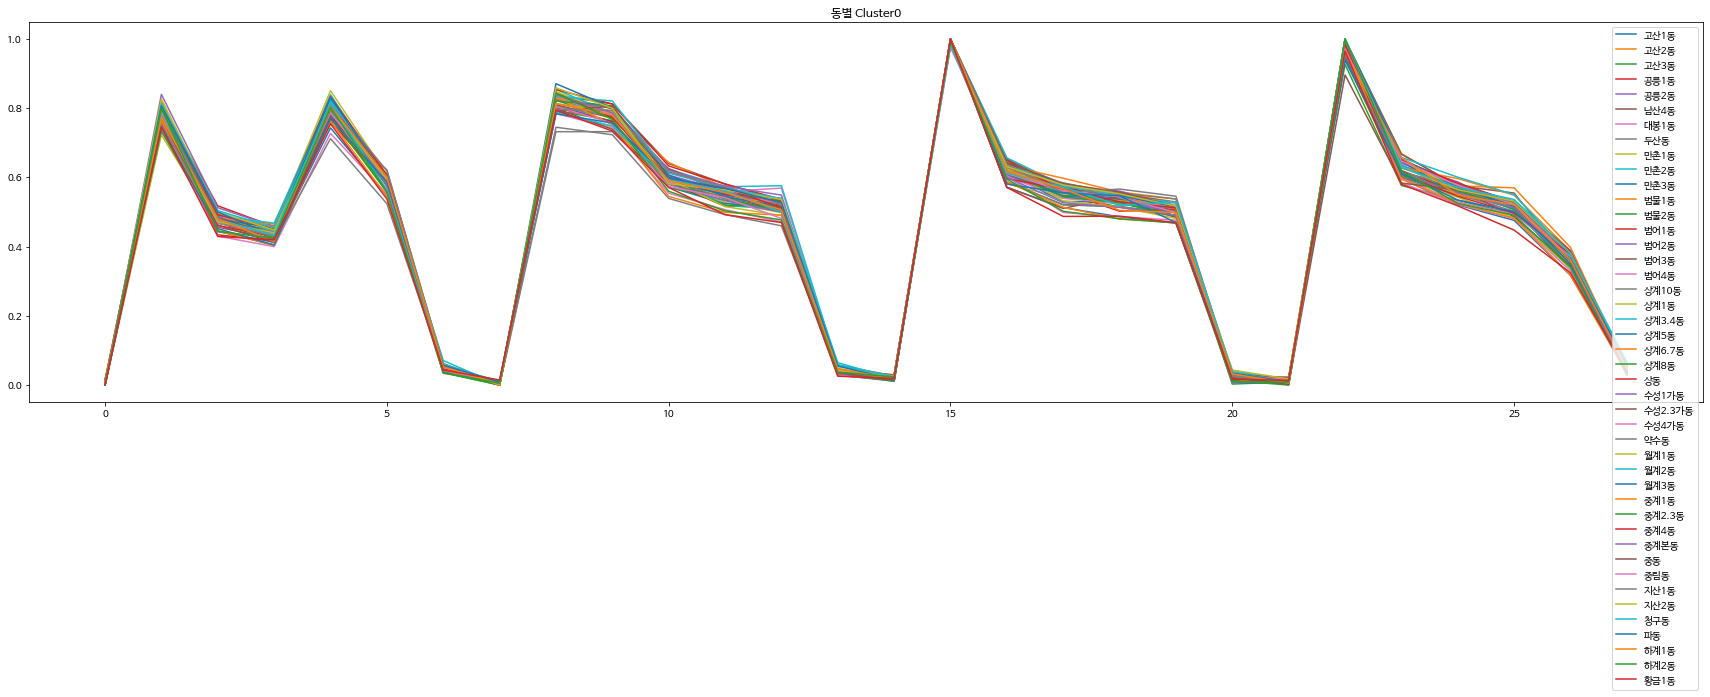

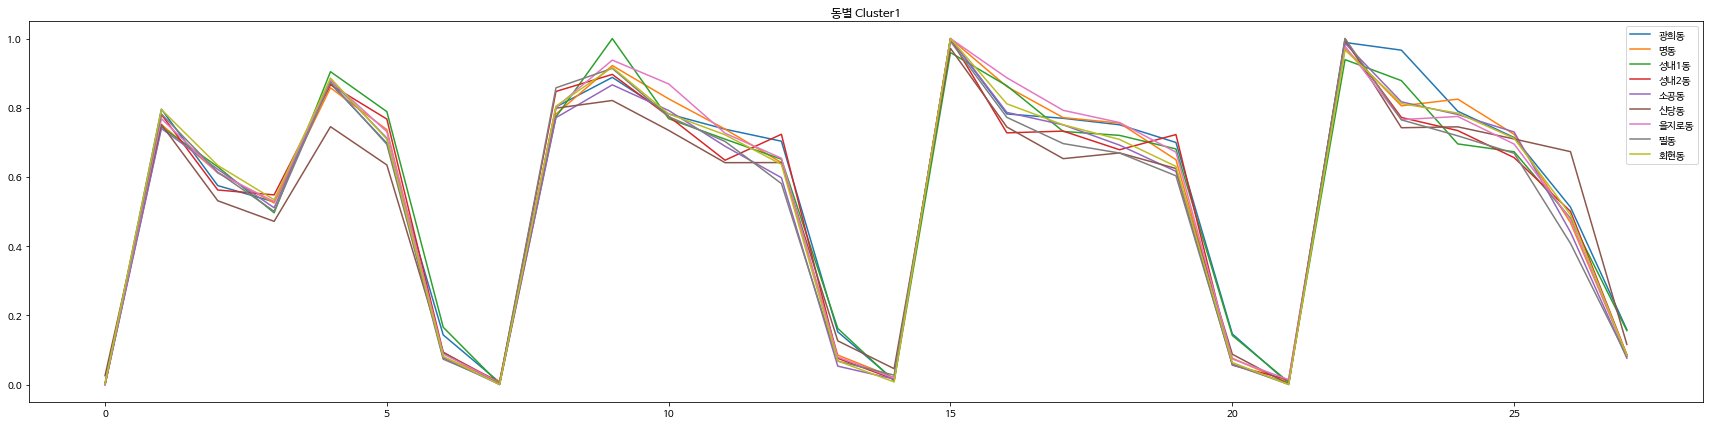

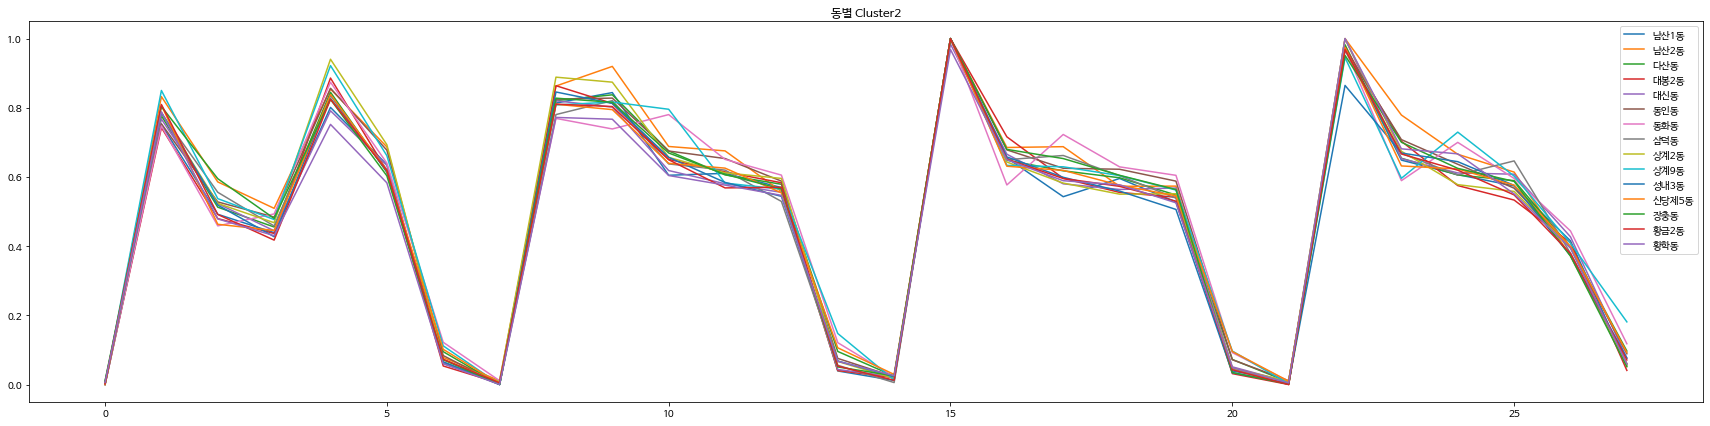

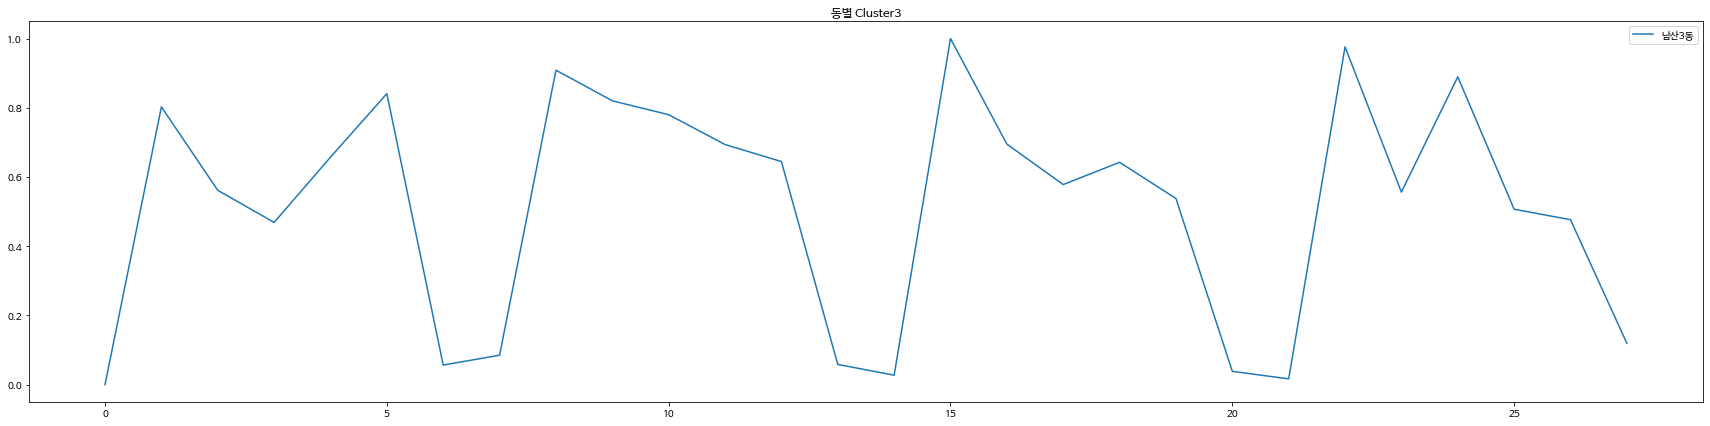

In [ ]:
for k in range(4): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  idx = cluster0['name']
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
  plt.title('동별 Cluster' + str(k))
  plt.legend(idx)
  plt.show()